In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
# loading the data 
sales_data = pd.read_csv('/content/Train.csv')
#checking the first 5 rows of the dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_data.shape

(8523, 12)

In [5]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#stastical measures about the data
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# getting the null values information 
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Replacing the missing values in the "Item_Weight"column
# mean value of "Item_Weight" column
sales_data['Item_Weight'].mean()

12.857645184135976

In [9]:
# filling the missing values in "Item_weight column" with "Mean" value

sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(),inplace=True)

In [10]:
sales_data['Item_Weight'].isnull().sum()

0

In [11]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
#Replacing the missing values in the "Outlet_Size"column

# mode of "Outlet_Size" column
sales_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
# filling the missing values in "Outlet_Size" column with Mode
#Here we take Outlet_Size column & Outlet_Type column since they are correlated
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [14]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [15]:
miss_values = sales_data['Outlet_Size'].isnull()

In [16]:
print(miss_values.head())

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool


False represents it is not null that means the value is present

True represents a particular value is missing

In [17]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [18]:
sales_data['Outlet_Size'].isnull().sum()

0

# DATA VISUALIZATION

In [19]:
#VISUALIZATION OF NUMERICAL FEATURES

In [20]:
# customization of seaborn
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


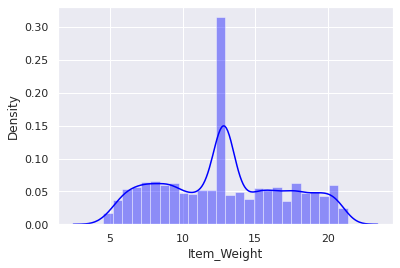

In [21]:
# Item_Weight distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Weight'], color='blue')
plt.show()

Hence from the above graph we can observe that we have the item weight from 5 Kg to 21 Kg & we have maximum values around 12 Kg where the mean is 12.85 Kg

Therefore in this 8523 products the average weight is about 12.8 Kg

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


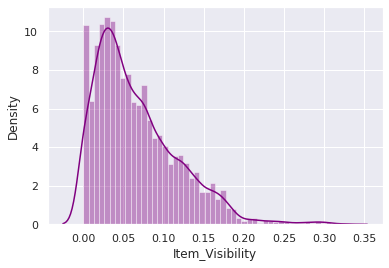

In [22]:
# Item Visibility distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_Visibility'], color='purple')
plt.show()

Hence from the above graph we can observe that Item_Visibility feature is positively skewed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


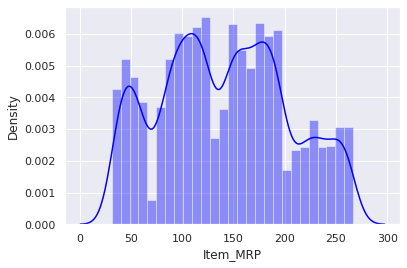

In [23]:
# Item MRP distribution
#plt.figure(figsize=(5,5))
sns.distplot(sales_data['Item_MRP'], color='blue')
plt.show()

From the above graph, we can observe that we have good amount of products for 50 MRP, 100 MRP ,200 MRP & then we have less products

Hence we have more products in the range of 100 MRP - 180 MRP.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


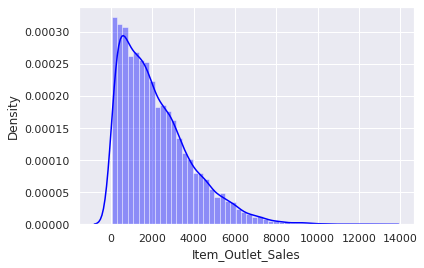

In [24]:
# Item_Outlet_Sales distribution

sns.distplot(sales_data['Item_Outlet_Sales'], color='blue')
plt.show()

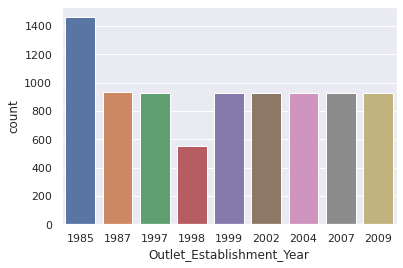

In [25]:
# Outlet_Establishment_Year column

sns.countplot(x='Outlet_Establishment_Year', data=sales_data)
plt.show()

Hence from the above graph we can observe that we have the outlet establishment from the year 1985, 1987 and all the way to 2009

Therefore these are the years on which different outlets or different stores have been established

We can also observe that a lots of stores are established in the year 1985 & less in the year 1998 & all the others years are almost same

## VISUALIZATION OF CATEGORICAL FEATURES

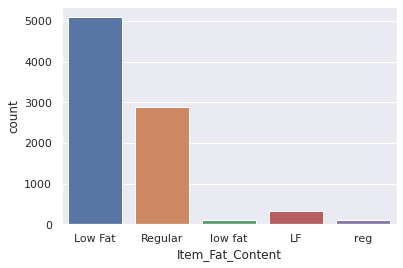

In [26]:
# Item_Fat_Content column
sns.countplot(x='Item_Fat_Content', data=sales_data)
plt.show()

From the above graph we can observe that the data in the Item_Fat_Content column has to be cleaned since we have columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.Similarly we have Regular & reg where we need to put this into a single entity.

Hence, we need to pre process this data so we will be dealing with this in a later point of time after the visualization of the data

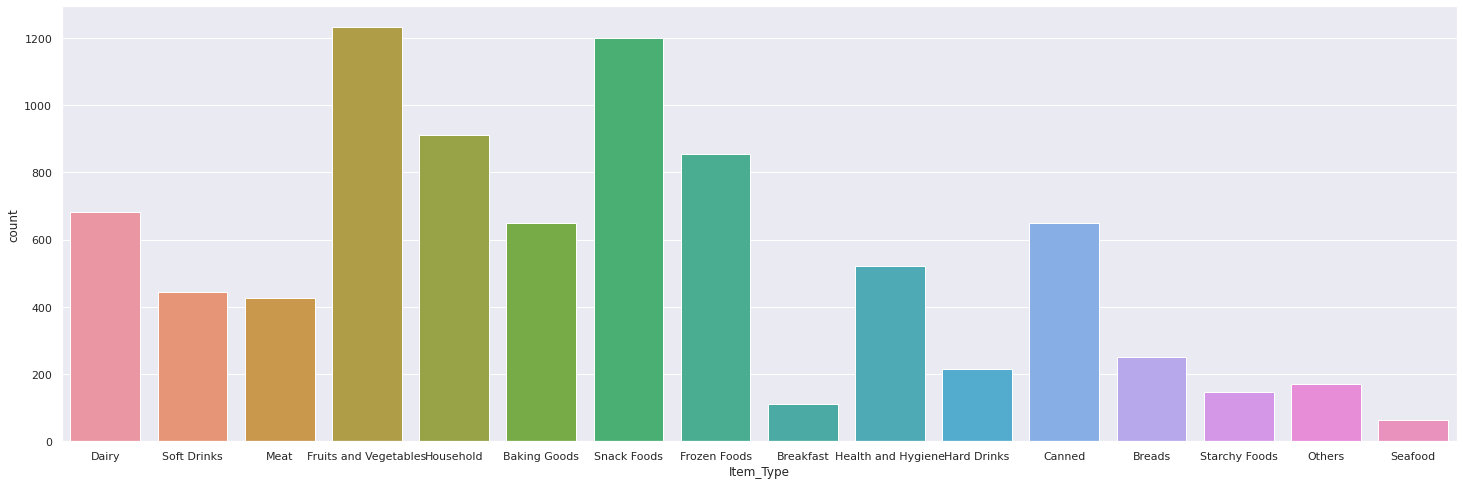

In [27]:
# Item_Type column
plt.figure(figsize=(25,8))
sns.countplot(x='Item_Type', data=sales_data)
plt.show()

From the above graph we can observe the different items or food types we have such as dairy, soft drinks, meat, fruits & vegetables, household etc

Hence totally we have about 16 Item_Type values in this case where we have more values in the fruits & vegetables column and snack foods column

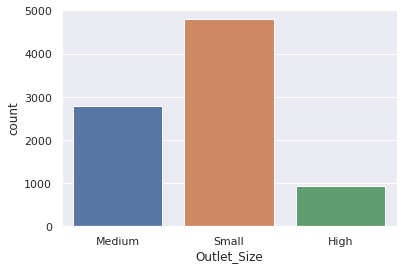

In [28]:
# Outlet_Size column
sns.countplot(x='Outlet_Size', data=sales_data)
plt.show()

From the above graph, we can observe that we have three outlet_Size in this case which is medium, small & high

## PREPROCESSING OF DATA

In [29]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [30]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [31]:
sales_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [32]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Hence, we have successfully cleaned the data in Item_Fat_Content column

In [33]:
# list of numerical variables
numerical_features = [feature for feature in sales_data.columns if sales_data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

print(numerical_features)

Number of numerical variables:  5
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [34]:
# list of Categorical Features
categorical_features = [feature for feature in sales_data.columns if sales_data[feature].dtypes == 'O']

print('Number of Categorical Features: ', len(categorical_features))

print(categorical_features)

Number of Categorical Features:  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [35]:
encoder = LabelEncoder()

In [36]:
for features in categorical_features:
    sales_data[features] = encoder.fit_transform(sales_data[features])



In [37]:
sales_data[categorical_features].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,2,2,0
4,1297,0,9,1,0,2,1


Hence, we have only numerical values in our data where these categories are given some specific numerical values if it is unique

Therefore we have successfully encoded categorical columns into numerical values which is an important data preprocessing step.

SPLITTING FEATURES AND TARGET INTO X & Y RESPECTIVELY

We know that the data in the "Item_Outlet_Sales" column is the target & remaining are the features

In [38]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = sales_data['Item_Outlet_Sales']

In [39]:
#SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


MACHINE LEARNING MODEL TRAINING - XGBoost Regressor

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [41]:
regressor = XGBRegressor()
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

[00:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [42]:
#PREDICTION OF THE DATA
sales_data_prediction = regressor.predict(X_train)

In [43]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.6349054954866349


In [44]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [45]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)

In [46]:
print('R Squared value = ', r2_data)

R Squared value =  0.5891285114557054


In [47]:
import pickle

pickle.dump(regressor, open('SalesPrediction.pkl','wb'))

Thus we have built the model to predict the sales & have performed the evaluation successfully

In [48]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train, Y_train)

ExtraTreesRegressor()

In [49]:
print(model.feature_importances_)

[0.06746615 0.04777298 0.01889465 0.0730425  0.05551869 0.41478506
 0.03248697 0.03354533 0.01273637 0.01141698 0.23233433]


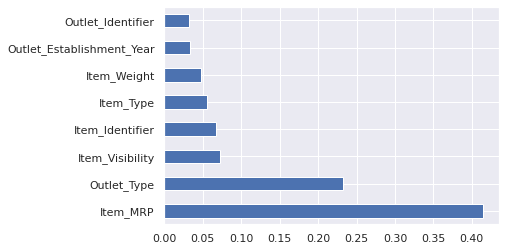

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

regressor.fit(X_train, Y_train)
# Predict on test data
prediction = regressor.predict(X_test)
# Compute mean squared error
r2_data = metrics.r2_score(Y_test, prediction)
# Print results
print(r2_data)


0.5373335511905497
